In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

from citipy import citipy



from config import api_key



In [2]:
#Generate the DataFrame of Random Cities
num_cities = 100
#{'coord': {'lon': , 'lat': }
latitude = np.random.uniform(-90, 90,num_cities)
longitude = np.random.uniform(-180, 180,num_cities)




cities = []
latitude_NS = []
longitude_WE = []
for city in range(0,num_cities):
    near_city = citipy.nearest_city(latitude[city],longitude[city])
    city_name = near_city.city_name 
    cities.append(city_name)
    
    if latitude[city] < 0:
        latitude_NS.append(str(abs(latitude[city])) +'S')
    else:
        latitude_NS.append(str(abs(latitude[city])) + 'N')
    
    if longitude[city] < 0:
        longitude_WE.append(str(abs(longitude[city])) + 'W')
    else:
        longitude_WE.append(str(longitude[city]) + 'E')
        
        
cities_dict = {
    'City': cities,
    'Random Latitude': latitude,
    'Random Longitude': longitude,
    'Latitude_NS': latitude_NS,
    'Longitude_WE': longitude_WE
    
    
}
cities_df = pd.DataFrame(cities_dict)


cities_df.head(20)  


,City,Random Latitude,Random Longitude,Latitude_NS,Longitude_WE
0,castro,-46.913325,-99.074096,46.913324805293406S,99.07409586004812W
1,victoria,-6.884914,61.180574,6.884913566606144S,61.180574183271375E
2,carnarvon,-30.630079,95.772551,30.630078584651493S,95.77255133597566E
3,araouane,18.227343,-2.555180,18.22734307462187N,2.5551804144490404W
4,torbay,48.266560,-45.302259,48.266559791863756N,45.30225874537052W
5,atuona,-8.406785,-146.950428,8.406785338619372S,146.95042821679766W
6,bredasdorp,-47.110066,20.881104,47.110065665248214S,20.881103903718923E
7,santo domingo,22.637861,-80.264247,22.637860683410665N,80.26424728003394W
8,iqaluit,58.488436,-70.812688,58.48843627224551N,70.812688299838W
9,haines junction,57.724185,-142.179951,57.72418508393068N,142.17995124769783W


In [3]:
# Save config information

#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"

units = 'imperial'
cities = cities_df['City']
city = "Cape Town"

# Build query URL
#query_url = url + 'lat=' + latitud + '&lon=' + longitud + "&appid=" + api_key + "&units=metric"

query_url = url + 'q=' + city + '&appid=' + api_key + '&units=metric'

#Series that contains every 
cities_url = url + 'q=' + cities_df['City'] + '&appid=' + api_key + '&units=' + units




cities_df




,City,Random Latitude,Random Longitude,Latitude_NS,Longitude_WE
0,castro,-46.913325,-99.074096,46.913324805293406S,99.07409586004812W
1,victoria,-6.884914,61.180574,6.884913566606144S,61.180574183271375E
2,carnarvon,-30.630079,95.772551,30.630078584651493S,95.77255133597566E
3,araouane,18.227343,-2.555180,18.22734307462187N,2.5551804144490404W
4,torbay,48.266560,-45.302259,48.266559791863756N,45.30225874537052W
...,...,...,...,...,...
95,qaanaaq,78.603527,-82.915890,78.60352704840119N,82.91589018110922W
96,mataura,-47.396848,-155.877307,47.396848004018075S,155.8773068424483W
97,salalah,12.504516,61.595128,12.50451570174657N,61.595127832044966E
98,busselton,-61.884669,96.290715,61.88466851071966S,96.29071537148127E


In [4]:
# Get weather data
#weather_response = requests.get(query_url) #requests.models.Response
#weather_json = weather_response.json() #dict
#city_coord = weather_json['coord'] #dict
#city_coord

# Series with all the responses
cities_Response = cities_url.apply(requests.get) #pandas.core.series.Series requests.models.Response
print(cities_Response)


cities_Response[5].json()


0     <Response [200]>
1     <Response [200]>
2     <Response [200]>
3     <Response [200]>
4     <Response [200]>
            ...       
95    <Response [200]>
96    <Response [200]>
97    <Response [200]>
98    <Response [200]>
99    <Response [200]>
Name: City, Length: 100, dtype: object


{'coord': {'lon': -139.0333, 'lat': -9.8},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 79.7,
  'feels_like': 79.7,
  'temp_min': 79.7,
  'temp_max': 79.7,
  'pressure': 1013,
  'humidity': 74,
  'sea_level': 1013,
  'grnd_level': 1005},
 'visibility': 10000,
 'wind': {'speed': 17.45, 'deg': 120, 'gust': 17.54},
 'rain': {'1h': 0.11},
 'clouds': {'all': 94},
 'dt': 1619494937,
 'sys': {'country': 'PF', 'sunrise': 1619450393, 'sunset': 1619492851},
 'timezone': -34200,
 'id': 4020109,
 'name': 'Atuona',
 'cod': 200}

In [15]:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

temp = []
lat = []
lon = []
humidity = []
cloudiness = []
wind = []
city_name = []

for n in range(0,len(cities_Response)):
    response = cities_Response[n].json()
    if response['cod'] == '404':
        temp.append(None)
        lat.append(None)
        lon.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind.append(None)
        city_name.append(None)
    else:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_name.append(response['name'])
        
        

dict = {
    'City' : city_name,
    'Temperature': temp,
    'Latitude': lat,
    'Longitude' : lon,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Sped (mph)': wind
}

plot_df_na = pd.DataFrame(dict)
plot_df = plot_df_na.dropna(how = 'all')
plot_df

,City,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Sped (mph)
0,Castro,54.91,-24.7911,-50.0119,94.0,2.0,3.18
1,Hong Kong,72.36,22.2855,114.1577,92.0,100.0,1.99
2,Carnarvon,82.40,-24.8667,113.6333,42.0,0.0,5.75
3,Araouane,86.43,18.9048,-3.5265,15.0,32.0,9.15
4,Torbay,39.87,47.6666,-52.7314,93.0,90.0,17.27
...,...,...,...,...,...,...,...
95,Qaanaaq,33.75,77.4840,-69.3632,67.0,100.0,7.36
96,Mataura,46.00,-46.1927,168.8643,75.0,91.0,5.01
97,Salalah,80.60,17.0151,54.0924,74.0,40.0,2.30
98,Busselton,74.61,-33.6500,115.3333,70.0,35.0,3.00


In [16]:
#Divide the Data Between Norther and Southern Hemispher
northern = plot_df.loc[plot_df['Latitude']>= 0,:]
southern = plot_df.loc[plot_df['Latitude'] < 0,:]




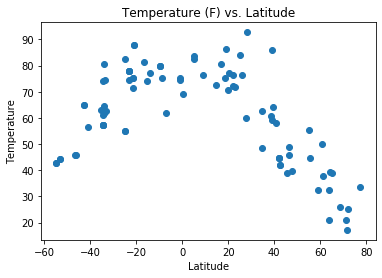

In [17]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Temperature'] )
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature (F) vs. Latitude')
plt.show()



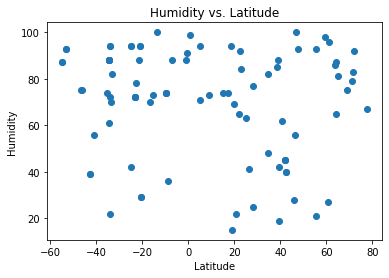

In [18]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Humidity'] )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude')
plt.show()



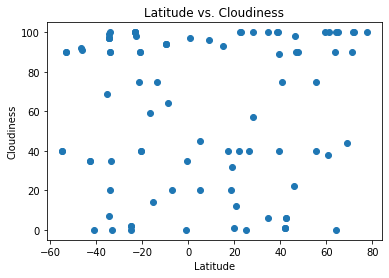

In [19]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Cloudiness'] )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()



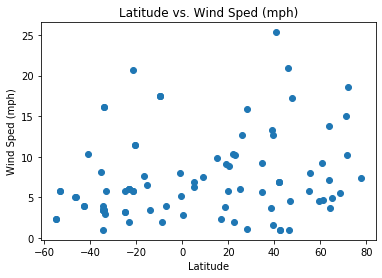

In [20]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Wind Sped (mph)'] )
plt.xlabel('Latitude')
plt.ylabel('Wind Sped (mph)')
plt.title('Latitude vs. Wind Sped (mph)')
plt.show()


In [21]:
#Save to CSV

file_path = '../VacationPy/Cities.csv'
plot_df.to_csv(file_path, index = False)